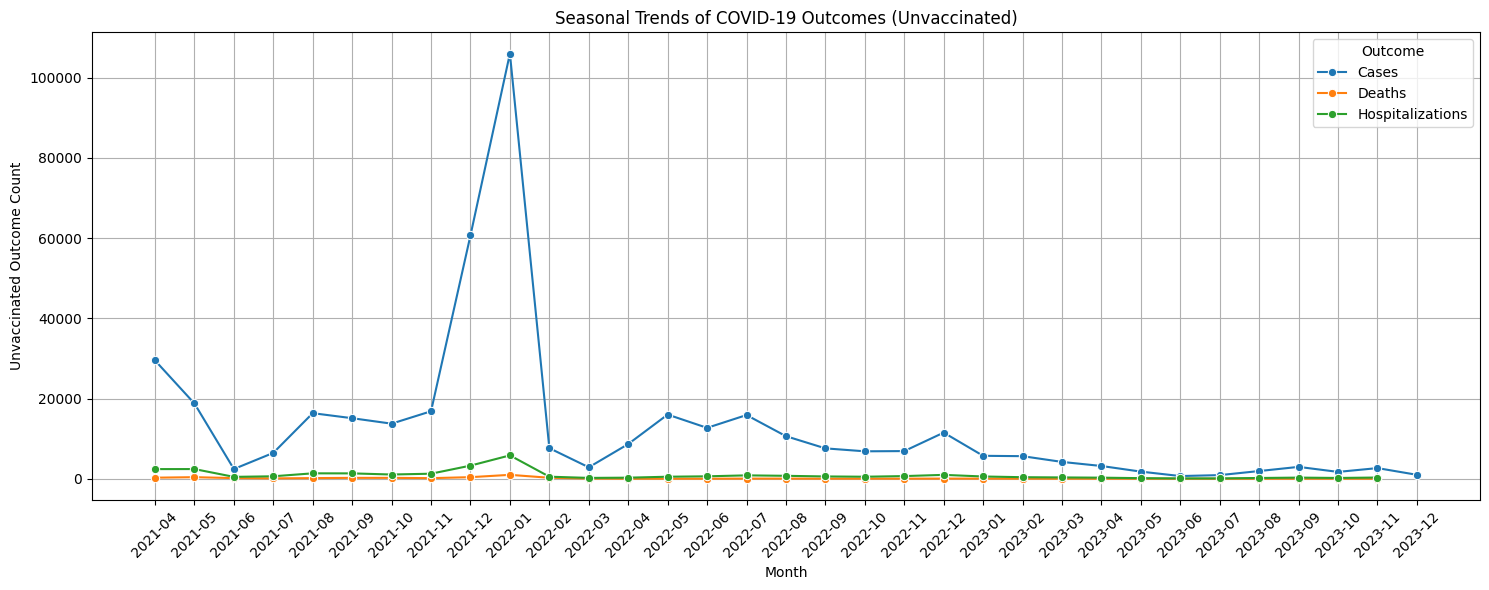

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv("/content/COVID-19_Outcomes_by_Vaccination_Status_-_Historical (2) (1).csv")

# Convert Week End to datetime
df['Week End'] = pd.to_datetime(df['Week End'])


df_seasonal = df.copy()
df_seasonal['Month'] = df_seasonal['Week End'].dt.to_period('M')
seasonal_summary = df_seasonal.groupby(['Month', 'Outcome'])[['Outcome Unvaccinated', 'Outcome Vaccinated', 'Outcome Boosted']].sum().reset_index()
seasonal_summary['Month'] = seasonal_summary['Month'].astype(str)

plt.figure(figsize=(15, 6))
sns.lineplot(data=seasonal_summary, x='Month', y='Outcome Unvaccinated', hue='Outcome', marker='o')
plt.xticks(rotation=45)
plt.title('Seasonal Trends of COVID-19 Outcomes (Unvaccinated)')
plt.ylabel('Unvaccinated Outcome Count')
plt.xlabel('Month')
plt.tight_layout()
plt.grid(True)
plt.show()



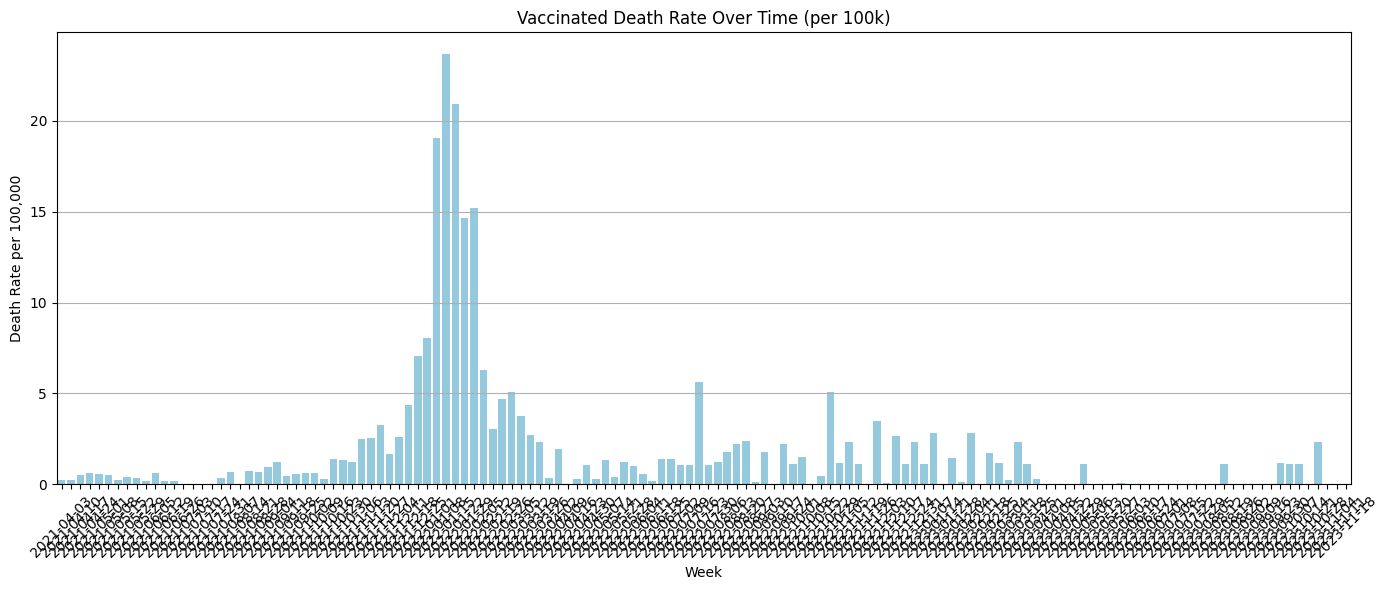

In [14]:
df_vax = df[(df['Outcome'] == 'Deaths') & df['Population Vaccinated'].notna() & df['Outcome Vaccinated'].notna()]
df_vax = df_vax[df_vax['Population Vaccinated'] > 0]

df_vax['Vaccinated Death Rate per 100k'] = (df_vax['Outcome Vaccinated'] / df_vax['Population Vaccinated']) * 100000
vax_death_rate_by_week = df_vax.groupby('Week End')['Vaccinated Death Rate per 100k'].mean().reset_index()

plt.figure(figsize=(14, 6))
sns.barplot(data=vax_death_rate_by_week, x='Week End', y='Vaccinated Death Rate per 100k', color='skyblue')
plt.xticks(rotation=45)
plt.title('Vaccinated Death Rate Over Time (per 100k)')
plt.ylabel('Death Rate per 100,000')
plt.xlabel('Week')
plt.tight_layout()
plt.grid(True, axis='y')
plt.show()


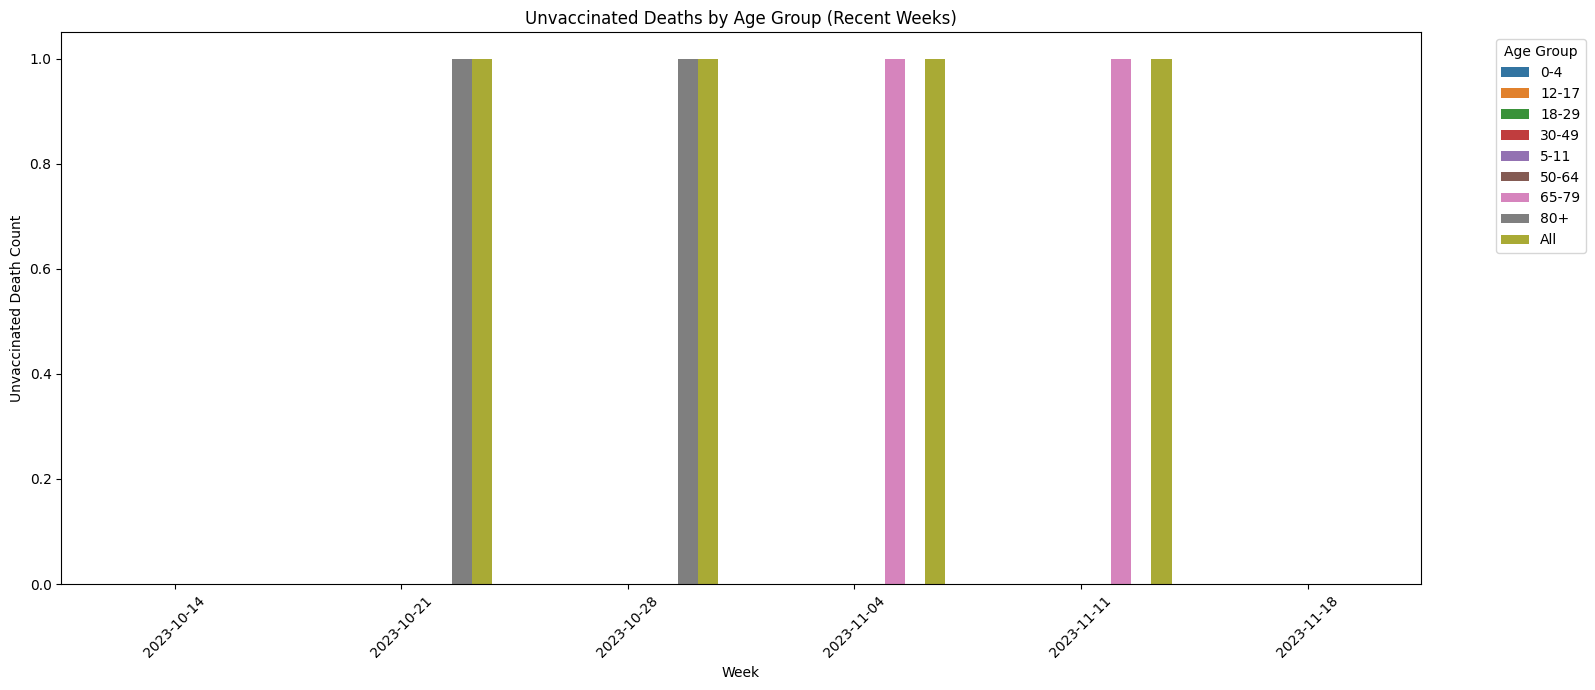

In [13]:
df['Week End'] = pd.to_datetime(df['Week End'])

# Filter only unvaccinated deaths
df_unvax = df[df['Outcome'] == 'Deaths']

# Group by Week and Age Group
grouped = df_unvax.groupby(['Week End', 'Age Group'])['Outcome Unvaccinated'].sum().reset_index()

# Select a smaller number of weeks for readability (e.g., last 6)
latest_weeks = grouped['Week End'].drop_duplicates().sort_values().tail(6)
filtered = grouped[grouped['Week End'].isin(latest_weeks)]

# Plot grouped bar chart
plt.figure(figsize=(16, 7))
sns.barplot(data=filtered, x='Week End', y='Outcome Unvaccinated', hue='Age Group')
plt.title('Unvaccinated Deaths by Age Group (Recent Weeks)')
plt.xlabel('Week')
plt.ylabel('Unvaccinated Death Count')
plt.xticks(rotation=45)
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<ipython-input-12-1ce3ed06fb16>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_grouped, x='Efficiency Score', y='Age Group', palette='viridis')
<ipython-input-12-1ce3ed06fb16>:36: UserWarning: Glyph 128137 (\N{SYRINGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128137 (\N{SYRINGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


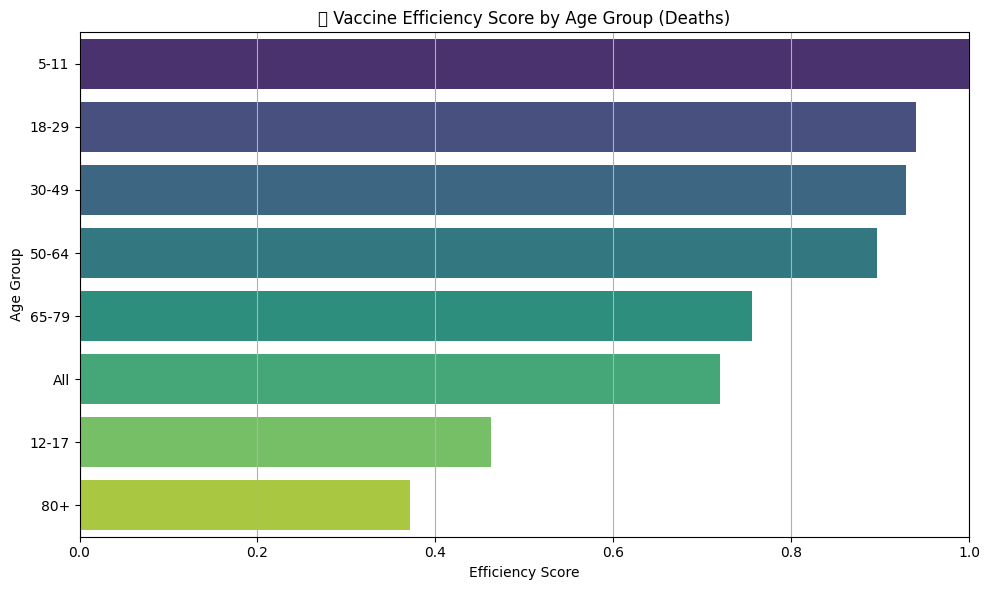

In [12]:
df['Week End'] = pd.to_datetime(df['Week End'])

# Filter only 'Deaths' outcome and drop missing data
df_deaths = df[df['Outcome'] == 'Deaths'].copy()
df_deaths = df_deaths.dropna(subset=['Outcome Unvaccinated', 'Outcome Vaccinated', 'Population Unvaccinated', 'Population Vaccinated'])

# Remove rows with zero population to avoid division errors
df_deaths = df_deaths[(df_deaths['Population Unvaccinated'] > 0) & (df_deaths['Population Vaccinated'] > 0)]

# Group by age group
age_grouped = df_deaths.groupby('Age Group').agg({
    'Outcome Unvaccinated': 'sum',
    'Population Unvaccinated': 'sum',
    'Outcome Vaccinated': 'sum',
    'Population Vaccinated': 'sum'
}).reset_index()

# Calculate death rates per 100k
age_grouped['Unvaccinated Rate'] = (age_grouped['Outcome Unvaccinated'] / age_grouped['Population Unvaccinated']) * 100000
age_grouped['Vaccinated Rate'] = (age_grouped['Outcome Vaccinated'] / age_grouped['Population Vaccinated']) * 100000

# Efficiency Score
age_grouped['Efficiency Score'] = (age_grouped['Unvaccinated Rate'] - age_grouped['Vaccinated Rate']) / age_grouped['Unvaccinated Rate']

# Sort by efficiency
age_grouped = age_grouped.sort_values('Efficiency Score', ascending=False)

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=age_grouped, x='Efficiency Score', y='Age Group', palette='viridis')
plt.title('💉 Vaccine Efficiency Score by Age Group (Deaths)')
plt.xlabel('Efficiency Score')
plt.ylabel('Age Group')
plt.xlim(0, 1)
plt.grid(axis='x')
plt.tight_layout()
plt.show()

<ipython-input-11-7244d873122f>:24: UserWarning: Glyph 128128 (\N{SKULL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128128 (\N{SKULL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


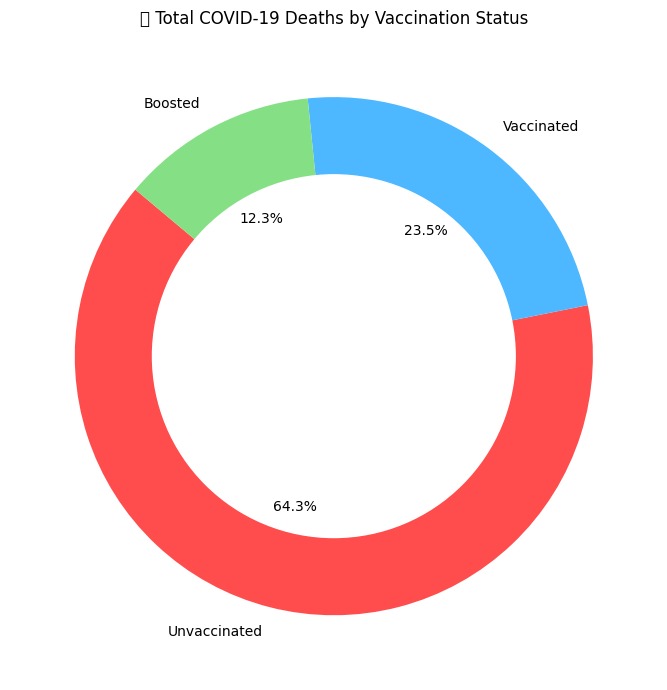

In [11]:
df_deaths = df[df['Outcome'] == 'Deaths']

# Sum total deaths by vaccination status
total_unvax = df_deaths['Outcome Unvaccinated'].sum()
total_vax = df_deaths['Outcome Vaccinated'].sum()
total_boosted = df_deaths['Outcome Boosted'].sum()

# Labels and sizes for the chart
labels = ['Unvaccinated', 'Vaccinated', 'Boosted']
sizes = [total_unvax, total_vax, total_boosted]
colors = ['#ff4d4d', '#4db8ff', '#85e085']  # Red, Blue, Green

# Create the donut chart
plt.figure(figsize=(7, 7))
wedges, texts, autotexts = plt.pie(
    sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140,
    wedgeprops=dict(width=0.4)  # donut shape
)

# Center circle
plt.gca().add_artist(plt.Circle((0, 0), 0.70, color='white'))

plt.title('💀 Total COVID-19 Deaths by Vaccination Status')
plt.tight_layout()
plt.show()


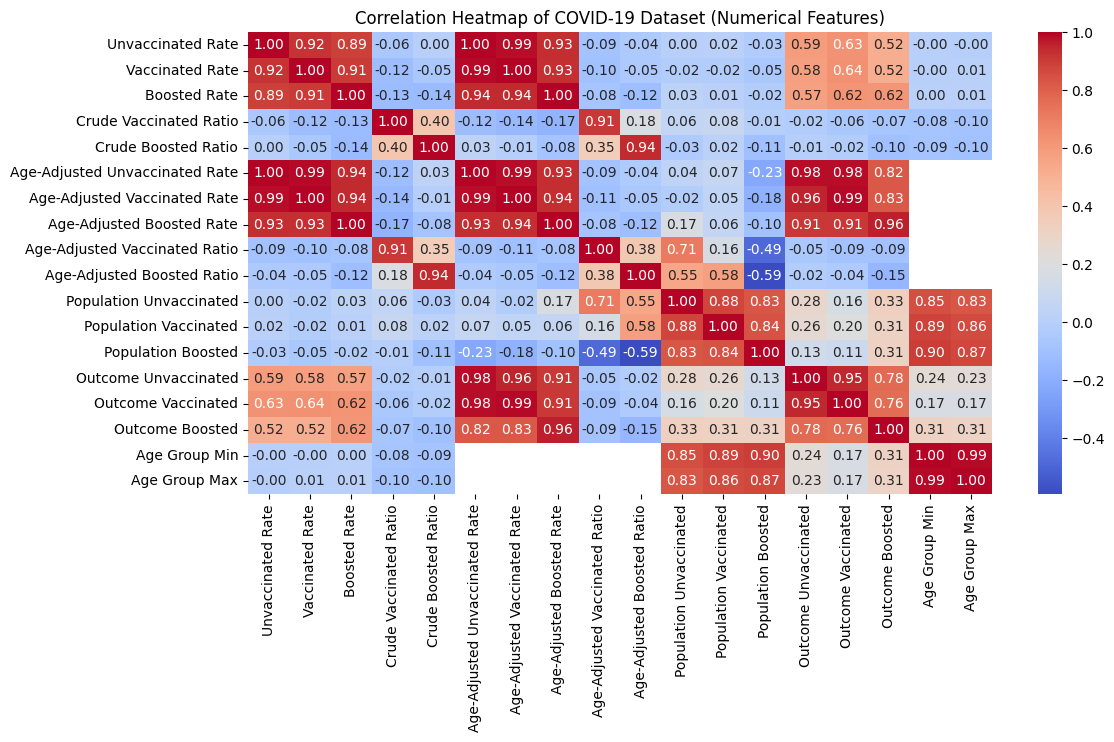

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already loaded as in your example
# ... (your existing code to load and preprocess the data)

# Select only numerical features for correlation
numerical_df = df.select_dtypes(include=['number'])

# Create the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of COVID-19 Dataset (Numerical Features)')
plt.show()